In [1]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot'])
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, classification_report,
                             confusion_matrix)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn import tree

In [3]:
df = pd.read_csv('C:\\Users\\User\\Downloads\\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.shape

(7043, 21)

In [10]:
df.drop('customerID',axis=1,inplace=True)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [11]:
df['TotalCharges'].describe()

count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object

In [12]:
#no. of nulls
len(df[df['TotalCharges']==" "])

11

In [13]:
#turns blanks into NaN
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [14]:
#fill NaN with median to prevent model-traning errors..
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())
len(df[df['TotalCharges']==" "])

0

In [15]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [16]:
df['Churn']=df['Churn'].apply(lambda x:1 if x=='Yes' else 0)
df['Churn'].value_counts()# imbalance 

Churn
0    5174
1    1869
Name: count, dtype: int64

In [17]:
df['SeniorCitizen']=df['SeniorCitizen'].astype('object')

In [18]:
categorical=list(df.select_dtypes(include=['object']).columns)
numerical=list(df.select_dtypes(include=['number']).columns)

In [19]:
categorical

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [20]:
numerical

['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [21]:
numerical.remove('Churn')

In [46]:
#calculate the feature impotance
global_mean=df['Churn'].mean()
round(global_mean,2)

np.float64(0.27)

In [47]:
churn_gender=df.groupby('gender').Churn.mean()
gender_risk= churn_gender/global_mean
gender_risk 
# The differance between rates is small so gender is not important feature

gender
0    1.014466
1    0.985807
Name: Churn, dtype: float64

In [24]:
churn_partner=df.groupby('Partner').Churn.mean()
partner_risk= churn_partner/global_mean
partner_risk

Partner
No     1.241964
Yes    0.741038
Name: Churn, dtype: float64

In [25]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [26]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [27]:
#required for Logistic Regression
scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])

df[numerical].head()

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994242
1,0.066327,-0.259629,-0.173244
2,-1.236724,-0.362660,-0.959674
3,0.514251,-0.746535,-0.194766
4,-1.236724,0.197365,-0.940470


In [28]:
corr_num=df[numerical].corr()
sns.heatmap(corr_num,annot=True)

<Axes: >

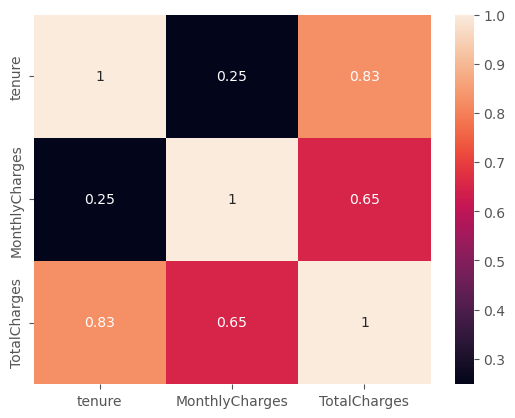

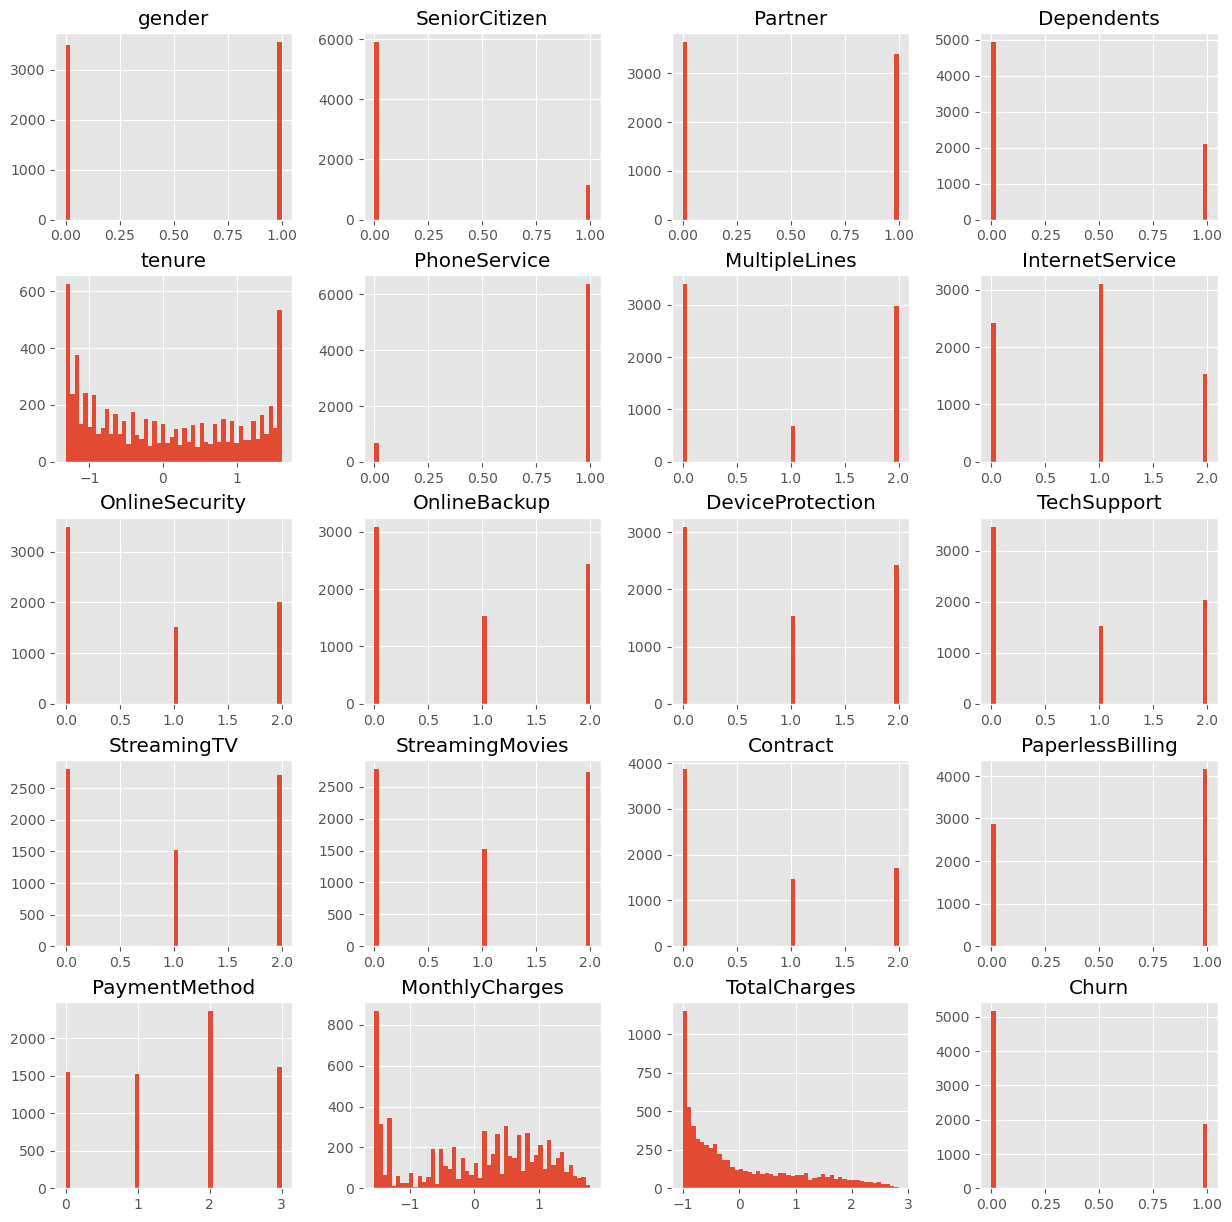

In [29]:
df.hist(bins=50,figsize=(15,15))
plt.show()

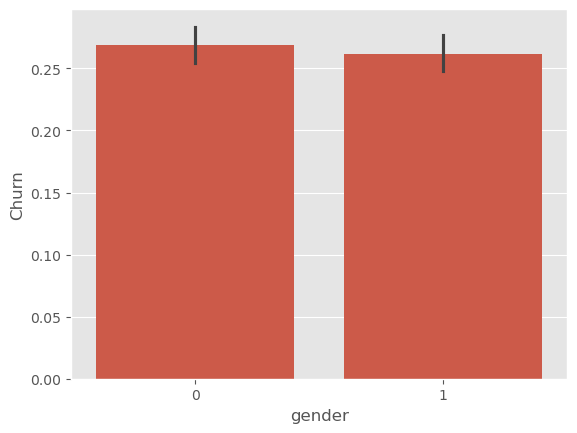

In [30]:
sns.barplot(data=df,x=df['gender'],y=df['Churn'])
plt.show()

In [31]:
df.drop('Churn',axis=1).corrwith(df.Churn).plot(kind='bar',grid=True,figsize=(10,6),title="Correlation with Churn ")

<Axes: title={'center': 'Correlation with Churn '}>

In [32]:
x=df.drop(columns=['Churn'],axis=1)
y=df['Churn']

In [33]:
y.value_counts() #imbalance

Churn
0    5174
1    1869
Name: count, dtype: int64

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=44)

print(f"the shape of x_train is : {x_train.shape}")
print(f'the shape of x_test is : {x_test.shape}')
print(f'the shape of y_tain is : {y_train.shape}')
print(f'the shape of y_test is {y_test.shape}')

the shape of x_train is : (5282, 19)
the shape of x_test is : (1761, 19)
the shape of y_tain is : (5282,)
the shape of y_test is (1761,)


In [35]:
l = LGBMClassifier(random_state=42)
model = l.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:,1]

print("Classification report:")
print(classification_report(y_test, y_pred, digits=4))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 4))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
#ignore the error, afterrunning this second time it will run.

[LightGBM] [Info] Number of positive: 1406, number of negative: 3876
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 5282, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266187 -> initscore=-1.014055
[LightGBM] [Info] Start training from score -1.014055
Classification report:
              precision    recall  f1-score   support

           0     0.8395    0.8983    0.8679      1298
           1     0.6452    0.5184    0.5749       463

    accuracy                         0.7984      1761
   macro avg     0.7423    0.7083    0.7214      1761
weighted avg     0.7884    0.7984    0.7908      1761

ROC AUC: 0.8378
Confusion matrix:
 [[1166  132]
 [ 223  240]]


C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

In [36]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
model2 = dt.fit(x_train, y_train)

y_pred = model2.predict(x_test)
y_proba = model2.predict_proba(x_test)[:,1]

print("Classification report:")
print(classification_report(y_test, y_pred, digits=4))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 4))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0     0.8000    0.9276    0.8591      1298
           1     0.6328    0.3499    0.4506       463

    accuracy                         0.7757      1761
   macro avg     0.7164    0.6387    0.6549      1761
weighted avg     0.7560    0.7757    0.7517      1761

ROC AUC: 0.8182
Confusion matrix:
 [[1204   94]
 [ 301  162]]


In [37]:
lr = LogisticRegression(max_iter=1000, random_state=42)
model3 = lr.fit(x_train, y_train)

y_pred = model3.predict(x_test)
y_proba = model3.predict_proba(x_test)[:,1]

print("Classification report:")
print(classification_report(y_test, y_pred, digits=4))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 4))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0     0.8395    0.8983    0.8679      1298
           1     0.6452    0.5184    0.5749       463

    accuracy                         0.7984      1761
   macro avg     0.7423    0.7083    0.7214      1761
weighted avg     0.7884    0.7984    0.7908      1761

ROC AUC: 0.8474
Confusion matrix:
 [[1166  132]
 [ 223  240]]


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import joblib

In [45]:
try:
    from imblearn.over_sampling import SMOTE
    smote_available = True
except ImportError:
    smote_available = False
    print("imblearn not installed -> running without SMOTE")

df_fe = df.copy()
df_fe['TotalCharges'] = pd.to_numeric(
    df_fe['TotalCharges'].astype(str).str.strip().replace('', np.nan),
    errors='coerce'
)
df_fe['TotalCharges'].fillna(df_fe['MonthlyCharges'] * df_fe['tenure'], inplace=True)

# Feature engineering
df_fe['monthly_per_tenure'] = df_fe['MonthlyCharges'] / df_fe['tenure'].replace(0, np.nan)
df_fe['monthly_per_tenure'].fillna(df_fe['MonthlyCharges'], inplace=True)
df_fe['high_total_flag'] = (df_fe['TotalCharges'] > df_fe['TotalCharges'].quantile(0.95)).astype(int)

Q1, Q3 = df_fe['MonthlyCharges'].quantile([0.25, 0.75])
IQR = Q3 - Q1
df_fe['MonthlyCharges'] = df_fe['MonthlyCharges'].clip(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

X = pd.get_dummies(df_fe.drop(columns='Churn'), drop_first=True)
y = df_fe['Churn']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

if smote_available:
    sm = SMOTE(random_state=42)
    X_train, y_train = sm.fit_resample(X_train, y_train)

scaler = StandardScaler()
num_cols = X_train.select_dtypes(include=np.number).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

print("Classification report:")
print(classification_report(y_test, y_pred, digits=4))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 4))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


C:\Users\User\AppData\Local\Temp\ipykernel_5328\1206323950.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fe['TotalCharges'].fillna(df_fe['MonthlyCharges'] * df_fe['tenure'], inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_5328\1206323950.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

Classification report:
              precision    recall  f1-score   support

           0     0.8915    0.7875    0.8363      1294
           1     0.5550    0.7345    0.6323       467

    accuracy                         0.7734      1761
   macro avg     0.7233    0.7610    0.7343      1761
weighted avg     0.8023    0.7734    0.7822      1761

ROC AUC: 0.8369
Confusion matrix:
 [[1019  275]
 [ 124  343]]


In [40]:
results = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest","LightGBM"],
    "Accuracy": [0.80, 0.76, 0.78, 0.80],
    "Precision (Churn)": [0.65, 0.63, 0.60, 0.65],
    "Recall (Churn)": [0.52, 0.35, 0.43, 0.52],
    "F1-Score (Churn)": [0.57, 0.45, 0.50,0.57],
}
df_results = pd.DataFrame(results)
df_results

,Model,Accuracy,Precision (Churn),Recall (Churn),F1-Score (Churn)
0,Logistic Regression,0.80,0.65,0.52,0.57
1,Decision Tree,0.76,0.63,0.35,0.45
2,Random Forest,0.78,0.60,0.43,0.50
3,LightGBM,0.80,0.65,0.52,0.57


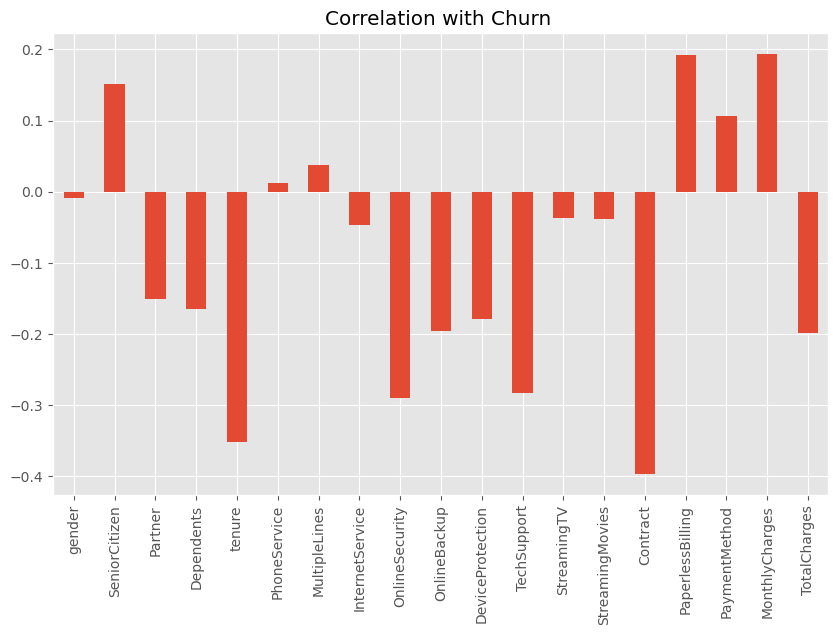

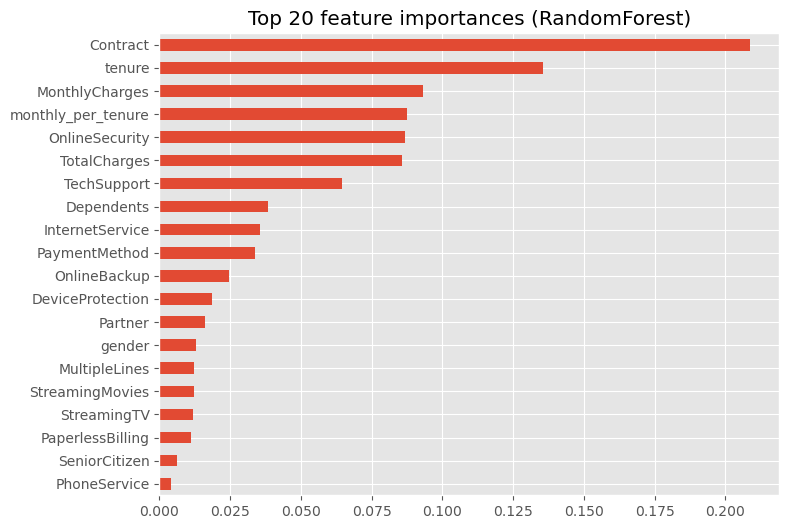

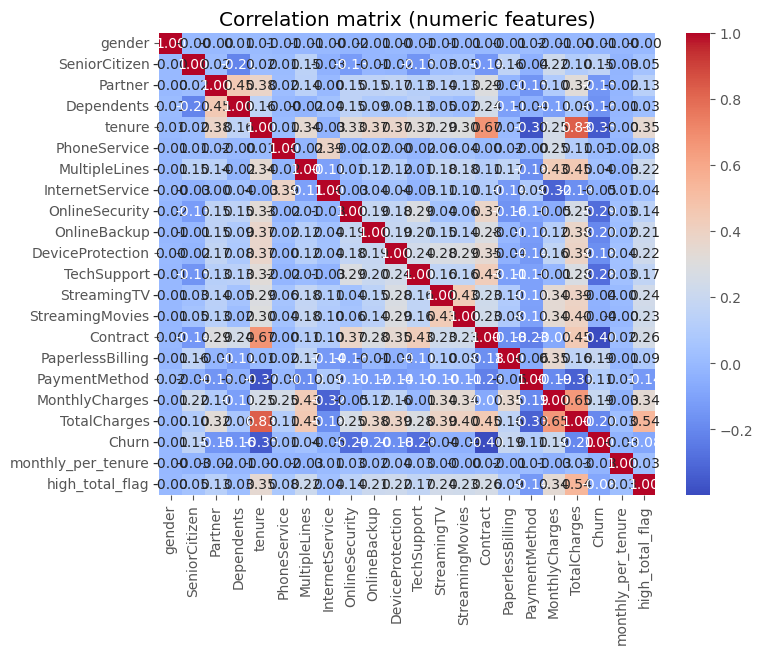

In [41]:
# Feature importance
feat_imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
feat_imp.head(20).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 20 feature importances (RandomForest)")
plt.show()

# Correlation heatmap for numeric features including churn
numeric_cols = df_fe.select_dtypes(include=[np.number]).columns.tolist()
if 'Churn' in numeric_cols:
    plt.figure(figsize=(8,6))
    sns.heatmap(df_fe[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Correlation matrix (numeric features)")
    plt.show()

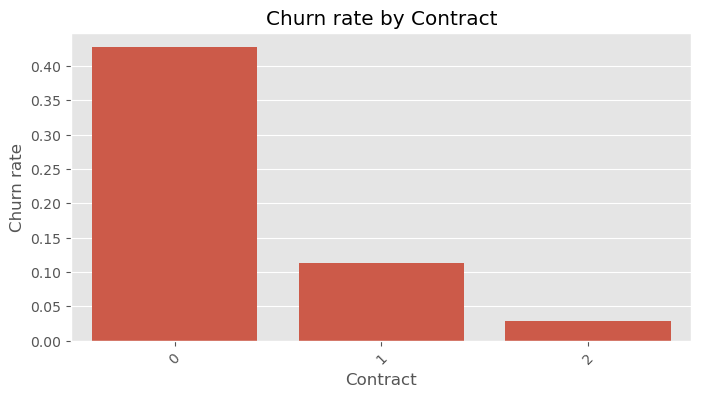

          churn_rate
Contract            
0           0.427097
1           0.112695
2           0.028319


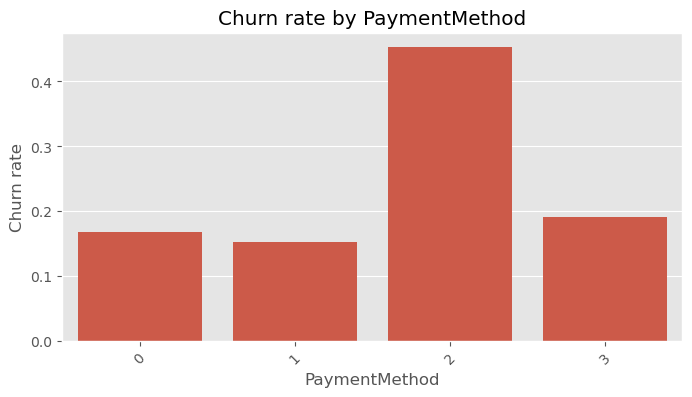

               churn_rate
PaymentMethod            
2                0.452854
3                0.191067
0                0.167098
1                0.152431


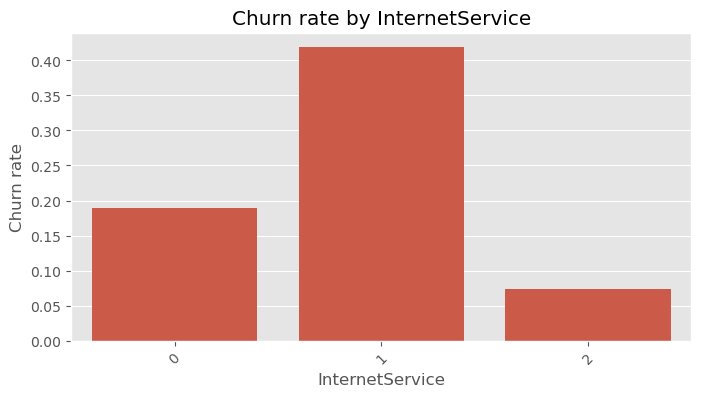

                 churn_rate
InternetService            
1                  0.418928
0                  0.189591
2                  0.074050


['scaler_simple.joblib']

In [42]:
# Simple churn-rate plots for important categories
def churn_rate_plot(col):
    if col not in df_fe.columns:
        return
    rates = df_fe.groupby(col)['Churn'].mean().sort_values(ascending=False)
    plt.figure(figsize=(8,4))
    sns.barplot(x=rates.index, y=rates.values)
    plt.xticks(rotation=45)
    plt.ylabel("Churn rate")
    plt.title(f"Churn rate by {col}")
    plt.show()
    print(rates.to_frame('churn_rate'))

for col in ['Contract', 'PaymentMethod', 'InternetService', 'tenure_group']:
    churn_rate_plot(col)

# Save model and scaler for later use
joblib.dump(rf, 'rf_model_simple.joblib')
joblib.dump(scaler, 'scaler_simple.joblib')


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {
    "Model": [],
    "Accuracy": [],
    "Precision (Churn)": [],
    "Recall (Churn)": [],
    "F1-Score (Churn)": [],
    "ROC AUC": []
}

def add_results(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    results["Model"].append(name)
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["Precision (Churn)"].append(precision_score(y_test, y_pred))
    results["Recall (Churn)"].append(recall_score(y_test, y_pred))
    results["F1-Score (Churn)"].append(f1_score(y_test, y_pred))
    results["ROC AUC"].append(roc_auc_score(y_test, y_proba))

add_results("Logistic Regression", model3, x_test, y_test)
add_results("Decision Tree", model2, x_test, y_test)
add_results("Random Forest", rf, X_test, y_test)   # rf trained on balanced X_train
add_results("LightGBM", model, x_test, y_test)

df_results = pd.DataFrame(results)
print(df_results)

df_results.style.format({
    "Accuracy": "{:.4f}",
    "Precision (Churn)": "{:.4f}",
    "Recall (Churn)": "{:.4f}",
    "F1-Score (Churn)": "{:.4f}",
    "ROC AUC": "{:.4f}"
})


                 Model  Accuracy  Precision (Churn)  Recall (Churn)  \
0  Logistic Regression  0.629188           0.250000        0.199143   
1        Decision Tree  0.665531           0.261719        0.143469   
2        Random Forest  0.773424           0.555016        0.734475   
3             LightGBM  0.623509           0.236559        0.188437   

   F1-Score (Churn)   ROC AUC  
0          0.221692  0.483519  
1          0.185339  0.485405  
2          0.632258  0.836950  
3          0.209774  0.480755  


,Model,Accuracy,Precision (Churn),Recall (Churn),F1-Score (Churn),ROC AUC
0,Logistic Regression,0.6292,0.2500,0.1991,0.2217,0.4835
1,Decision Tree,0.6655,0.2617,0.1435,0.1853,0.4854
2,Random Forest,0.7734,0.5550,0.7345,0.6323,0.8369
3,LightGBM,0.6235,0.2366,0.1884,0.2098,0.4808
